<center><h1>Parameter Estimation Using the Python Package pymcmcstat</h1></center>

**Authors:** Paul R. Miles & Ralph C. Smith

**Affiliation:** Department of Mathematics, North Carolina State University

**Project Repository:** https://github.com/prmiles/pymcmcstat

| [![docs](https://readthedocs.org/projects/pymcmcstat/badge/?version=latest)](https://pymcmcstat.readthedocs.io/en/latest/?badge=latest) | [![build](https://travis-ci.org/prmiles/pymcmcstat.svg?branch=master)](https://travis-ci.org/prmiles/pymcmcstat) | [![license](https://img.shields.io/badge/License-MIT-yellow.svg)](https://github.com/prmiles/pymcmcstat/blob/master/LICENSE.txt) | [![coverage](https://coveralls.io/repos/github/prmiles/pymcmcstat/badge.svg)](https://coveralls.io/github/prmiles/pymcmcstat) | [![zenodo](https://zenodo.org/badge/107596954.svg)](https://zenodo.org/badge/latestdoi/107596954) | [![pypi](https://img.shields.io/pypi/v/pymcmcstat.svg)](https://pypi.org/project/pymcmcstat/) | [![pyversion](https://img.shields.io/pypi/pyversions/pymcmcstat.svg)](https://pypi.org/project/pymcmcstat/) | [![joss](http://joss.theoj.org/papers/10.21105/joss.01417/status.svg)](https://doi.org/10.21105/joss.01417) |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|

SciPy 2019, July 12

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Parameter-Estimation-Using-the-Python-Package-pymcmcstat" data-toc-modified-id="Parameter-Estimation-Using-the-Python-Package-pymcmcstat-1">Parameter Estimation Using the Python Package pymcmcstat</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2">Introduction</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-3">Methodology</a></span></li><li><span><a href="#Basic-Example" data-toc-modified-id="Basic-Example-4">Basic Example</a></span></li><li><span><a href="#Options-and-Settings" data-toc-modified-id="Options-and-Settings-5">Options and Settings</a></span></li><li><span><a href="#Case-Studies" data-toc-modified-id="Case-Studies-6">Case Studies</a></span><ul class="toc-item"><li><span><a href="#Viscoelastic-Modeling-of-Dielectric-Elastomers" data-toc-modified-id="Viscoelastic-Modeling-of-Dielectric-Elastomers-6.1">Viscoelastic Modeling of Dielectric Elastomers</a></span></li><li><span><a href="#3-D-Radiation-Source-Localization" data-toc-modified-id="3-D-Radiation-Source-Localization-6.2">3-D Radiation Source Localization</a></span></li></ul></li><li><span><a href="#Concluding-Remarks" data-toc-modified-id="Concluding-Remarks-7">Concluding Remarks</a></span></li><li><span><a href="#Acknowledgments" data-toc-modified-id="Acknowledgments-8">Acknowledgments</a></span></li></ul></div>

# Introduction
- Basic purpose
    - Model calibration
    - Uncertainty quantification

- Goals in developing package
    - Python alternative to MATLAB toolbox: [mcmcstat](https://mjlaine.github.io/mcmcstat/)
    - MCMC package with Delayed Rejection (DR) algorithm [1]

[1] Heikki Haario, Marko Laine, Antonietta Mira, and Eero Saksman. DRAM: Efficient adaptive mcmc. Statistics and computing, 16(4):339–354, 2006. [doi:10.1007/s11222-006-9438-0](https://doi.org/10.1007/s11222-006-9438-0).

# Methodology

**Bayesian:** Estimate posterior densities
$$
\pi(q|F^{obs}(i)) = \frac{\mathcal{L}(F^{obs}(i)|q)\pi_0(q)}{\int_{\mathbb{R}^p}\mathcal{L}(F^{obs}(i)|q)\pi_0(q)dq},
$$

- $\mathcal{L}(F^{obs}(i)|q)$ - likelihood of the observations given a parameter set
- $\pi_0(q)$ - distribution describing any information known *a priori* about the parameters
- Denominator ensures distribution integrates to 1

Integrating over $\mathbb{R}^p$ makes direct evaluation unrealistic $\rightarrow$ use **Markov Chain Monte Carlo (MCMC)** methods!

**Statistical Model:** The pymcmcstat package is designed to work with statistical models of the form
$$
F^{obs}(i) = F(i; q) + \epsilon_i,\;\; \epsilon_i\sim\mathit{N}(0, \sigma^2).
$$

- $F^{obs}(i)$ - experimental data or high-fidelity simulations
- $F(i; q)$ - model response
- $\epsilon_i$ independent and identically distributed observation errors

$\rightarrow$ The likelihood function becomes
$$
    \mathcal{L}(F^{obs}(i)|q) = \exp\Big(-\frac{SS_q}{2\sigma^2}\Big),
$$
where 
$$
SS_q=\sum_{i=1}^{N_{obs}}[F^{obs}(i) - F(i, q)]^2
$$

**Metropolis Algorithm**:

1) Choose an initial parameter value $q^0$ that satisfies $\pi(q^0|F^{obs}(i))>0$ <br/>
2) For $k = 1,...,M$<br/>
&nbsp;&nbsp; a) For $z\sim N(0,1)$, construct candidate: $q^*=q^{k-1} + Rz$ <br/>
&nbsp;&nbsp; b) Compute posterior ratio:
$$
r(q^*|q^{k-1})=\frac{\pi(q^*|F^{obs}(i))}{\pi(q^{k-1}|F^{obs}(i))} = \frac{\mathcal{L}(F^{obs}(i)|q^*)\pi_0(q^*)}{\mathcal{L}(F^{obs}(i)|q^{k-1})\pi_0(q^{k-1})}
$$
&nbsp;&nbsp; c) Set $q^k = \begin{cases}q^*\;\;\;\;,\; \text{with probability } \alpha=\min(1,r), \\q^{k-1}\;,\; \text{else} \end{cases}$

<font color="blue">
If $\mathcal{L}(F^{obs}(i)|q) = \exp\Big(-\frac{SS_q}{2\sigma^2}\Big)$ and $\pi_0(q)$ is a uniform distribution, then
$$
r = \frac{\mathcal{L}(F^{obs}(i)|q^*)}{\mathcal{L}(F^{obs}(i)|q^{k-1})} = \exp\Big[-\frac{1}{2\sigma^2}(SS_{q^*}-SS_{q^{k-1}})\Big]
$$
</font>

# Basic Example

- We have a set of data that follows a linear trend - $F^{obs}(i)=y_i=2x_i + 3$
- Define observation errors with variance $\sigma^2=0.01 \rightarrow \sigma=0.1$
- Calibrate a model of the form $F(i; q) = y(x; q)=mx+b$, where $q=[m,b]$
```python
def model(data, q):
    m, b = q  # slope and offset
    x = data.xdata[0]
    return m*x + b
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

# Define model function
def model(data, q):
    m, b = q  # slope and offset
    x = data.xdata[0]
    return m*x + b

# Define sum of squares function
def ssfun(q, data):
    # Extract ydata
    ydata = data.ydata[0]
    # Evaluate model
    ymodel = model(data, q)
    res = ymodel.reshape(ydata.shape) - ydata
    return (res ** 2).sum(axis=0)

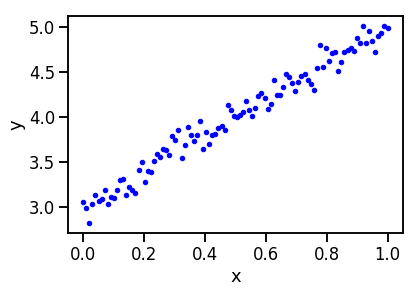

In [2]:
from pymcmcstat.MCMC import DataStructure
data = DataStructure()
data.add_data_set(x=np.linspace(0, 1, num=100), y=None)
qtrue = [2.0, 3.0]
x = data.xdata[0]
sigma = 0.1
y = model(data, qtrue) + sigma*np.random.standard_normal(x.shape)
fig = plt.figure()
ax = fig.gca()
tmp = ax.plot(x, y, '.b')
ax.set_xlabel('x')
ax.set_ylabel('y');

Define sum-of-squares error function
```python
def ssfun(q, data):
    # Extract ydata
    ydata = data.ydata[0]
    # Evaluate model
    ymodel = model(data, q)
    res = ymodel.reshape(ydata.shape) - ydata
    return (res ** 2).sum(axis=0)
```

In [3]:
from pymcmcstat.MCMC import MCMC
mcstat = MCMC()
mcstat.data.add_data_set(x, y)  # Add data
mcstat.model_settings.define_model_settings(
    sos_function=ssfun)  # Assign cost function
mcstat.simulation_options.define_simulation_options(
    nsimu=10.0e3,  # No. of MCMC simulations
    updatesigma=True)  # Update variance of obs. errors
# Add model parameters
mcstat.parameters.add_model_parameter(
    name='m',
    theta0=1.5) # initial guess
mcstat.parameters.add_model_parameter(
    name='b',
    theta0=2.75, # initial guess
    minimum=-5, # lower limit
    maximum=5) # upper limit
# Run MCMC simulation
mcstat.run_simulation()


Sampling these parameters:
      name      start [      min,       max] N(       mu,   sigma^2)
         m:      1.50 [     -inf,       inf] N( 0.00e+00,      inf)
         b:      2.75 [    -5.00,      5.00] N( 0.00e+00,      inf)
 [-----------------100%-----------------] 10000 of 10000 complete in 2.5 sec

In [4]:
# Extract results
results = mcstat.simulation_results.results
names = results['names']
chain = results['chain']
burnin = int(chain.shape[0]/2)
mcpl = mcstat.mcmcplot  # initialize plotting methods

In [5]:
mcstat.chainstats(chain[burnin:, :], results)



------------------------------
name      :       mean        std     MC_err        tau     geweke
m         :     2.0168     0.0355     0.0014     7.5169     0.9972
b         :     2.9952     0.0207     0.0008     8.2249     0.9999
------------------------------
Acceptance rate information
---------------
Results dictionary:
Stage 1: 21.81%
Stage 2: 54.21%
Net    : 76.02% -> 7602/10000
---------------
Chain provided:
Net    : 81.56% -> 4078/5000
---------------
Note, the net acceptance rate from the results dictionary
may be different if you only provided a subset of the chain,
e.g., removed the first part for burnin-in.
------------------------------


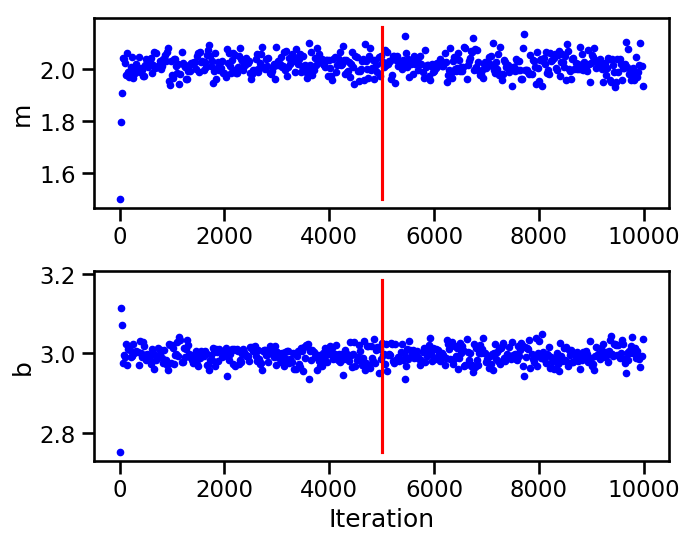

In [6]:
figcp = mcpl.plot_chain_panel(chain, names, figsizeinches=(7, 6))  
axes = figcp.get_axes()
for ii, ax in enumerate(axes):
    ch = chain[:, ii]
    ax.plot([burnin, burnin], [ch.min(), ch.max()], 'r')

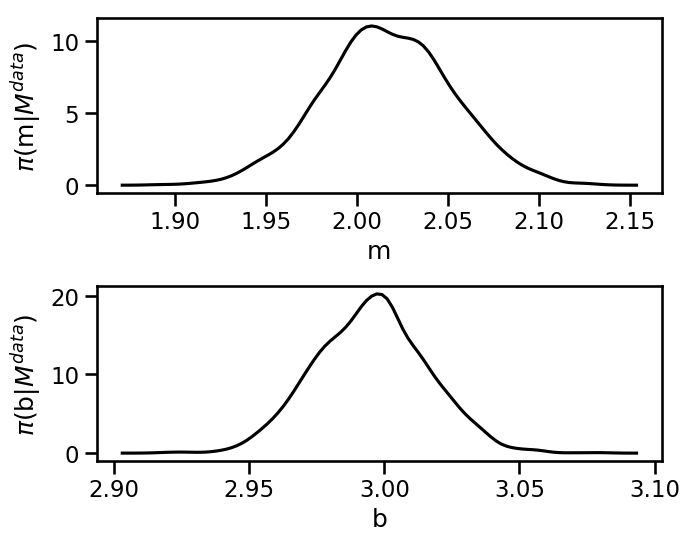

In [7]:
figdp = mcpl.plot_density_panel(chain[burnin:, :], names, figsizeinches=(7, 6))

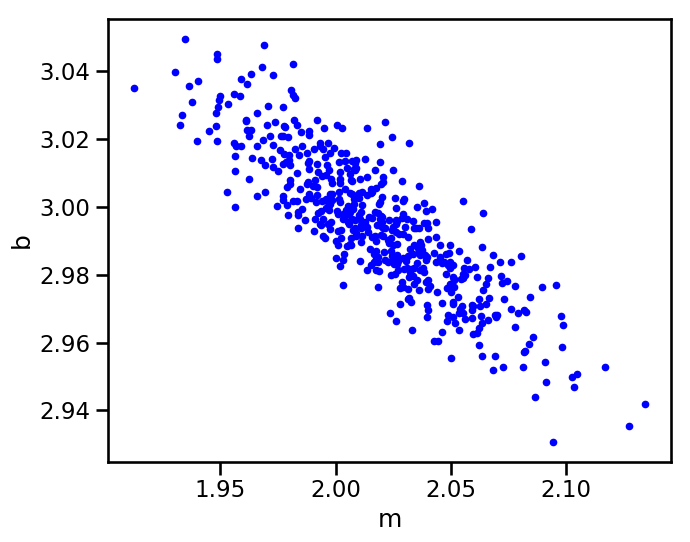

In [8]:
figpc = mcpl.plot_pairwise_correlation_panel(
          chain[burnin:, :], names, figsizeinches=(7, 6))

In [9]:
from pymcmcstat.MCMC import PredictionIntervals
PI = PredictionIntervals()

Generating credible/prediction intervals:


Interval generation complete



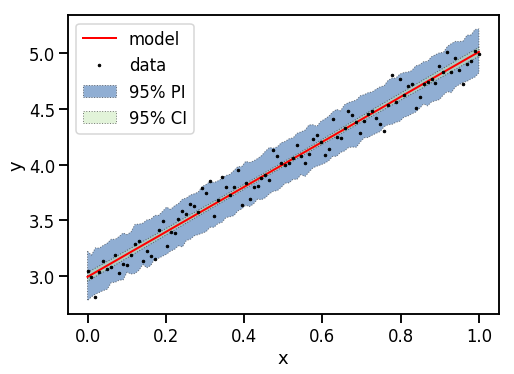

In [10]:
PI.setup_prediction_interval_calculation(results=results, data=mcstat.data,
    modelfunction=model, burnin=burnin)
PI.generate_prediction_intervals(calc_pred_int=True, waitbar=False)
fg, ax = PI.plot_prediction_intervals(adddata=True, plot_pred_int=True,
                                      figsizeinches=(7, 5), data_display=dict(color='k'))
ax[0].set_ylabel('y')
ax[0].set_xlabel('x');

# Options and Settings

```python
mcstat.simulation_options.define_simulation_options(
    nsimu=10.0e3, # No. of MCMC simulations
    method='dram', # Metropolis algorithm
    updatesigma=True, # Update obs. error var.
    savedir='mcmc_chains', # Output dir.
    save_to_bin=True, # Save chains to binary
    save_to_txt=True, # Save chains to text
    savesize=int(1.0e3), # Saving intervals
    waitbar=False, # Display progress bar
    verbosity=0, # Level of display while running
)

```


**Metropolis Algorithms:**

- MH: Metropolis Hastings
- AM: Adaptive Metropolis
    - Recall: For $z\sim N(0,1)$, construct candidate: $q^*=q^{k-1} + $<font color="red">$R$</font>$z$.
    - Adapt the proposal distribution as information is learned about the posterior distribution from accepted candidates.
- DR: Delayed Rejection
    - Recall: Set $q^k = \begin{cases}q^*\;,\; \text{with probability } \alpha=\min(1,r),\\ \text{Enter DR Algorithm}\end{cases}$
    - Sample from a narrower proposal distribution $\rightarrow$ stimulates mixing within chain
- DRAM: DR + AM

In [11]:
from ipywidgets import interact_manual
def testmetropolisalgorithm(method):
    if method.lower() in ['mh', 'am', 'dr', 'dram']:
        mcstat = MCMC()
        mcstat.data.add_data_set(x, y)  # Add data
        mcstat.model_settings.define_model_settings(
            sos_function=ssfun)  # Assign cost function
        mcstat.simulation_options.define_simulation_options(
            nsimu=10.0e3,  # No. of MCMC simulations
            method=method,  # Metropolis algorithm
            updatesigma=True)  # Update variance of obs. errors
        # Add model parameters
        mcstat.parameters.add_model_parameter(
            name='m',
            theta0=1.5) # initial guess
        mcstat.parameters.add_model_parameter(
            name='b',
            theta0=2.75, # initial guess
            minimum=-5, # lower limit
            maximum=5) # upper limit
        # Run MCMC simulation
        mcstat.run_simulation()
        # Extract results
        results = mcstat.simulation_results.results
        chain = results['chain']
        burnin = int(chain.shape[0]/2)
        # display chain statistics
        mcstat.chainstats(chain[burnin:, :], results)

In [12]:
f = interact_manual(testmetropolisalgorithm, method=['mh','am','dr','dram'])

interactive(children=(Dropdown(description='method', options=('mh', 'am', 'dr', 'dram'), value='mh'), Button(d…

# Case Studies
Full descriptions of the models used for each case study can be found by following the links to these pymcmcstat tutorials.
- [Viscoelastic modeling of dielectric elastomers](https://nbviewer.jupyter.org/github/prmiles/pymcmcstat/blob/master/tutorials/viscoelasticity/viscoelastic_analysis_using_ctypes.ipynb)
- [Radiation source localization](http://localhost:8888/notebooks/Google%20Drive/python_packages/pymcmcstat/tutorials/radiation_source_localization/radiation_source_localization.ipynb)

## Viscoelastic Modeling of Dielectric Elastomers
- Details regarding this research can be found in [3].
- Hyperelastic/viscoelastic model, $q=[G_c, G_e, \lambda_{max}, \eta, \gamma]$.
- Material deformation described by stretch $\lambda$.

$$s_{\infty} = \frac{1}{3}G_c\lambda\Big(\frac{9\lambda_{max} - I_1}{3\lambda_{max} - I_1}\Big) + G_e\lambda^{-1/2}(1-\lambda) - \frac{p}{\lambda}$$

$$\dot{Q} + \frac{\gamma}{\eta}Q = \gamma\dot{\lambda}$$

[3] Miles, Paul, Michael Hays, Ralph Smith, and William Oates. "Bayesian uncertainty analysis of finite deformation viscoelasticity." Mechanics of Materials 91 (2015): 35-49. [doi:10.1016/j.mechmat.2015.07.002](https://doi.org/10.1016/j.mechmat.2015.07.002).

- Most expensive part of MCMC is model evaluation
- Easy to couple non-Python models using `ctypes` 
```c++
#include <cmath>
#include <iostream>
extern "C" double* linear_viscoelastic_model(
float eta, float gamma, double *stretch, double *time,
    int nx)
{
...
return q;
}
```
- Run-time:
    - C++: 0.09 ms
    - Python: 0.8 ms

- For many problems, not all parameters will be identifiable
- Set parameters to a fixed value by specifying whether or not to sample

```python
mcstat.parameters.add_model_parameter(
    name='$G_c$',
    theta0=7.55,  # fixed value
    sample=False)
...
mcstat.parameters.add_model_parameter(
    name='$\\gamma$',
    theta0=31)  # initial value
```
```python
def ssfun(q, data):
    # Assign model parameters
    Gc, Ge, lam_max, eta, gamma = q
```

**Uncertainty Propagation:**

| <a href="https://nbviewer.jupyter.org/github/prmiles/pymcmcstat/blob/master/tutorials/viscoelasticity/viscoelastic_analysis_using_ctypes.ipynb"><img border="0" alt="visc_pi_wrt_time" src="https://raw.githubusercontent.com/prmiles/pymcmcstat/master/tutorials/viscoelasticity/viscoelasticity_pi.png" width="500"></a> | <a href="https://nbviewer.jupyter.org/github/prmiles/pymcmcstat/blob/master/tutorials/viscoelasticity/viscoelastic_analysis_using_ctypes.ipynb"><img border="0" alt="visc_pi_wrt_stretch" src="https://raw.githubusercontent.com/prmiles/pymcmcstat/master/tutorials/viscoelasticity/viscoelasticity_pi_wrt_stretch.png" width="500"></a> |
|:---:|:---:|

**2-D Radiation Source Localization**
Ray-tracing algorithm modeling uncollided flux as provided in [gefry3](https://github.com/jasonmhite/gefry3) [2]

<a href="https://nbviewer.jupyter.org/github/prmiles/pymcmcstat/blob/master/tutorials/radiation_source_localization/radiation_source_localization.ipynb"><img border="0" alt="CNEC" src="https://raw.githubusercontent.com/prmiles/pymcmcstat/master/tutorials/radiation_source_localization/source_distribution.png" width="350"></a>

[2] Hite, J., & Mattingly, J. (2018). Bayesian Metropolis Methods for Source Localization in an Urban Environment. Radiation Physics and Chemistry. [doi:10.1016/j.radphyschem.2018.06.024](https://doi.org/10.1016/j.radphyschem.2018.06.024).

## 3-D Radiation Source Localization
**Monte Carlo N-Particle (MCNP)**
- Computationally infeasible to run MCMC with MCNP
- Train surrogate models (from `scikit-learn`)
- Use surrogate models to infer distributions of $q=[x,y,z,I]$

| <img border="0" src="scipy_2019/urban_environment.png" width="400">| <img border="0" src="scipy_2019/rsl_x_vs_y.png" width="400"> | <img border="0" src="scipy_2019/rsl_x_vs_z.png" width="400"> |
|:---:|:---:|:---:|

# Concluding Remarks
- Basic purpose
    - Model calibration
    - Uncertainty quantification
- Goals in developing package
    - Python alternative to MATLAB toolbox: [mcmcstat](https://mjlaine.github.io/mcmcstat/)
    - MCMC package with Delayed Rejection (DR) algorithm
- Applicable to wide array of scientific and engineering problems

# Acknowledgments
This research was supported by the Department of Energy National Nuclear Security Administration (NNSA) under the Award Number DE-NA0002576 through the Consortium for Nonproliferation Enabling Capabilities (CNEC).  Additional support was provided by the Air Force Office of Scientific Research (AFOSR) through Award Number FA9550-15-1-0299.

<a href="https://cnec.ncsu.edu/"><img border="0" alt="CNEC" src="https://raw.githubusercontent.com/prmiles/pymcmcstat/master/doc/cnec-logo.png" width="500"></a>

**Additional References:**
- Smith, R. C. (2014). Uncertainty Quantification: Theory, Implementation, and Applications (Vol. 12). SIAM.
- Haario, H., Saksman, E., & Tamminen, J. (2001). An adaptive Metropolis algorithm. Bernoulli, 7(2), 223-242.
- Haario, H., Laine, M., Mira, A., & Saksman, E. (2006). DRAM: efficient adaptive MCMC. Statistics and computing, 16(4), 339-354.
- Hite, J., & Mattingly, J. (2018). Bayesian Metropolis Methods for Source Localization in an Urban Environment. Radiation Physics and Chemistry.
- Miles, Paul, Michael Hays, Ralph Smith, and William Oates. Bayesian uncertainty analysis of finite deformation viscoelasticity. Mechanics of Materials 91 (2015): 35-49.


In [31]:
methods = ['mh', 'am', 'dr', 'dram']
for method in methods:
    mcstat = MCMC()
    mcstat.data.add_data_set(x, y)  # Add data
    mcstat.model_settings.define_model_settings(
        sos_function=ssfun)  # Assign cost function
    mcstat.simulation_options.define_simulation_options(
        nsimu=10.0e3,  # No. of MCMC simulations
        method=method,
        savedir='method_' + method.lower(),
        save_to_json=True,
        save_lightly=True,
        save_to_bin=True,
        updatesigma=True)  # Update variance of obs. errors
    # Add model parameters
    mcstat.parameters.add_model_parameter(
        name='m',
        theta0=1.5) # initial guess
    mcstat.parameters.add_model_parameter(
        name='b',
        theta0=2.75, # initial guess
        minimum=-5, # lower limit
        maximum=5) # upper limit
    mcstat.run_simulation()


Sampling these parameters:
      name      start [      min,       max] N(       mu,   sigma^2)
         m:      1.50 [     -inf,       inf] N( 0.00e+00,      inf)
         b:      2.75 [    -5.00,      5.00] N( 0.00e+00,      inf)
 [-----------------100%-----------------] 10000 of 10000 complete in 0.9 sec
Sampling these parameters:
      name      start [      min,       max] N(       mu,   sigma^2)
         m:      1.50 [     -inf,       inf] N( 0.00e+00,      inf)
         b:      2.75 [    -5.00,      5.00] N( 0.00e+00,      inf)
 [-----------------100%-----------------] 10000 of 10000 complete in 1.0 sec
Sampling these parameters:
      name      start [      min,       max] N(       mu,   sigma^2)
         m:      1.50 [     -inf,       inf] N( 0.00e+00,      inf)
         b:      2.75 [    -5.00,      5.00] N( 0.00e+00,      inf)
 [-----------------100%-----------------] 10000 of 10000 complete in 2.5 sec
Sampling these parameters:
      name      start [      min,       max] 

In [13]:
from ipywidgets import interact_manual, fixed, widgets
from pymcmcstat.chain import ChainProcessing as CP
import os
def metropolisalgorithmchains(method, maxpoints):
    if method.lower() in ['mh', 'am', 'dr', 'dram']:
        # Extract results
        results = CP.load_serial_simulation_results(savedir='method_' + method.lower())
        chain = results['chain']
        burnin = int(chain.shape[0]/2)
        names = results['names']
        figcp = mcpl.plot_chain_panel(chain, names, figsizeinches=(7, 6),
                                      maxpoints=maxpoints)

In [14]:
f = interact_manual(metropolisalgorithmchains, method=['mh','am','dr','dram'],
         maxpoints=widgets.IntSlider(min=100, max=5000, step=100, value=500))

interactive(children=(Dropdown(description='method', options=('mh', 'am', 'dr', 'dram'), value='mh'), IntSlide…